# Exam 04

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('glass.data', names=['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', \
'Ba', 'Fe','Type'])
data.head()
data.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [43]:
building_windows = data[data['Type'] == 1] # building windows float processed
headlamps = data[data['Type'] == 7] # headlamps

print(building_windows.shape)
print(headlamps.shape)

# features
features = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', \
'Ba', 'Fe','Type']

dataset = pd.concat([building_windows, headlamps])

print(dataset.shape)

# we now normalize the data
# no need to normalize the id and type
for i in range(1, len(features)-1):
    dataset[features[i]] = (dataset[features[i]] - dataset[features[i]].mean()) / dataset[features[i]].std()
dataset.describe()

print(dataset[features[1:-1]].shape)

(70, 11)
(29, 11)
(99, 11)
(99, 9)


(9, 9)
(9, 99)
(9, 99)


Text(0.5, 1.0, 'Explained variance')

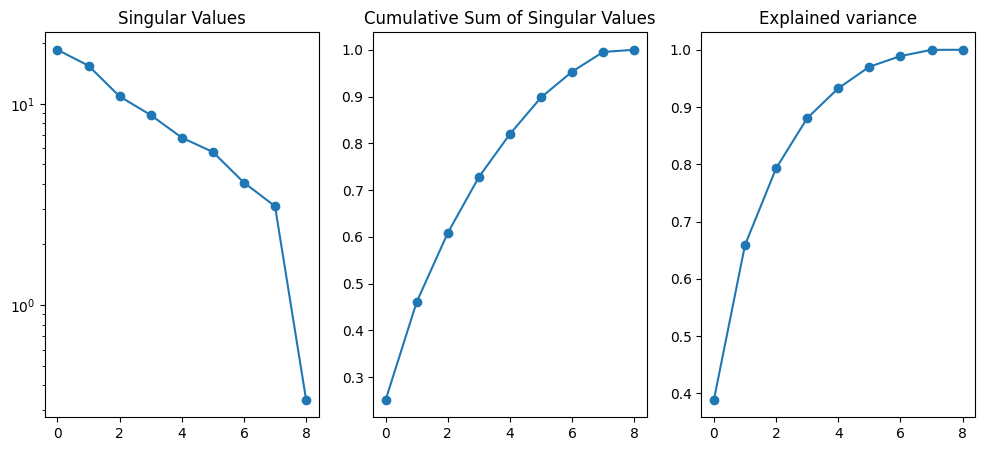

In [134]:
data = dataset[features[1:-1]]
A = np.array(data.T) # rows are features, columns are samples in PCA 
U, s, VT = np.linalg.svd(A, full_matrices = False) # computing svd

print(U.shape)
print(VT.shape)
print(A.shape)

# plotting the singular values

fig, axes = plt.subplots(1, 3, figsize = (12, 5))
axes = axes.flatten()

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singular Values')

axes[1].plot(np.cumsum(s)/np.sum(s),'o-')
axes[1].set_title('Cumulative Sum of Singular Values')

axes[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')
axes[2].set_title('Explained variance')

Consider now the first principle component. By looking at the components of the first principal direction,
do you expect building windows float processed glasses to have a large or small concentration of magnesium
and aluminium, respectively? And what about headlamps glasses?

(99,)
(99, 9)
[3.5003342027571547, 3.4490806957823423, 5.156268941759632, 5.045225508790765, 2.630307346456185, 0.8059401910607915, 2.3996954368688392, 4.59445639344279, 1.4612083191407559]


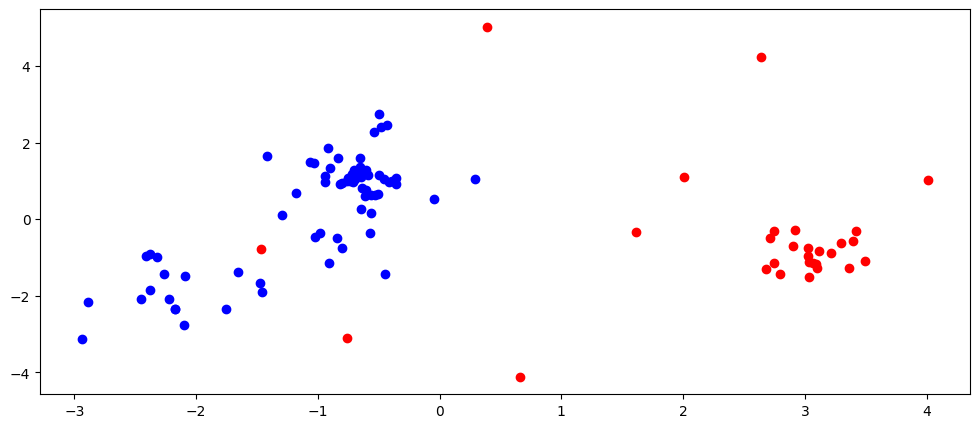

In [169]:
# we can see that the first two singular values explain most of the variance
# After calculating Phi, the information is projected onto the principal components

Phi = np.array(A.T @ U) # projecting the data onto the principal components

labels = dataset['Type'].values

print(labels.shape)

print(Phi.shape)

fig, axes = plt.subplots(1, 1, figsize = (12, 5))

# using the first two principal components we are able to separate the two classes
axes.scatter(Phi[labels == 7, 0], Phi[labels == 7, 1], label = 'headlamps', color='r', marker='o')
axes.scatter(Phi[labels == 1, 0], Phi[labels == 1, 1], label = 'building_window', color='b', marker='o')

# The information is projected onto the principal components so is not possible to evaluate the features
print([np.linalg.norm((s[0] * np.outer(U[:, 0], VT[0, :]))[i, labels == 1]) for i in range(9)])
#print(A[:, labels == 1].T @ U)

## Exercise 02

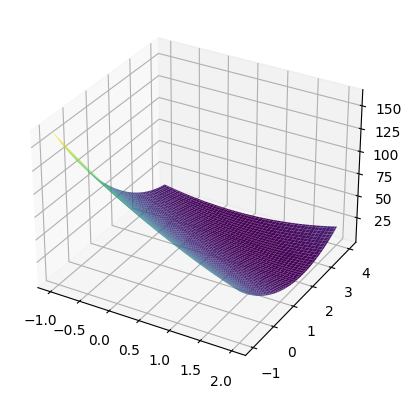

In [183]:
f = lambda x, y: (x+2*y-7)**2 +(2*x+y-5)**2

x = np.linspace(-1, 2, 100)
y = np.linspace(-1, 4, 100)

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, f(X, Y), cmap='viridis')

In [176]:
print(f(1, 3)) # minimum is at (1, 3)

0


In [186]:
import jax
import jax.numpy as jnp

def f(X):
    H = 2 * jnp.array([[5, 4], [4, 5]])
    dt = jnp.array([-34, -38])
    c = 74
    return 0.5 * X.T @ H @ X + dt @ X + c

In [194]:
f_jit = jax.jit(f)
grad_jit = jax.grad(f_jit)

print(f(jnp.array([1.0, 3.0]).T)) # we can see that the minimum is at 0
print(grad(jnp.array([1.0, 3.0]).T)) # we can see that the gradient is zero at the minimum

0.0
[0. 0.]


In [193]:
## Computing L
L = 2 * s[0] # The problem says that the radius of the spectral norm is 1, therefore is 1
alpha = 1/L

print(alpha)

0.026993610761291507


[-21.760002 -24.32    ] [0.3599999 1.0800002]
[19.456001 17.408005] [2.5360003 3.512    ]
[-13.926403 -15.564804] [0.5904001 1.7711996]
[12.451843 11.141125] [1.9830405 3.32768  ]
[-8.912896  -9.9614725] [0.73785615 2.2135677 ]
[7.9691772 7.1303177] [1.6291459 3.209715 ]
[-5.704254  -6.3753433] [0.8322281 2.4966831]
[5.100277 4.563404] [1.4026536 3.1342175]
[-3.6507225 -4.080223 ] [0.89262587 2.6778772 ]
[3.2641754 2.9205818] [1.257698  3.0858996]
[-2.336464  -2.6113434] [0.9312805 2.7938414]
[2.0890732 1.8691711] [1.1649269 3.0549757]
[-1.4953346 -1.671257 ] [0.9560196 2.8680587]
[1.3370056 1.1962662] [1.105553  3.0351844]
[-0.9570122 -1.069603 ] [0.9718525 2.9155579]
[0.8556824  0.76560974] [1.0675538 3.0225182]
[-0.6124878 -0.6845436] [0.9819855 2.9459572]
[0.5476341  0.48999023] [1.0432343 3.0144114]
[-0.39199066 -0.43811035] [0.9884709 2.9654124]
[0.35048676 0.31359482] [1.02767   3.0092235]
[-0.25087357 -0.28038788] [0.99262136 2.977864  ]
[0.22431183 0.20069885] [1.0177088 3.005

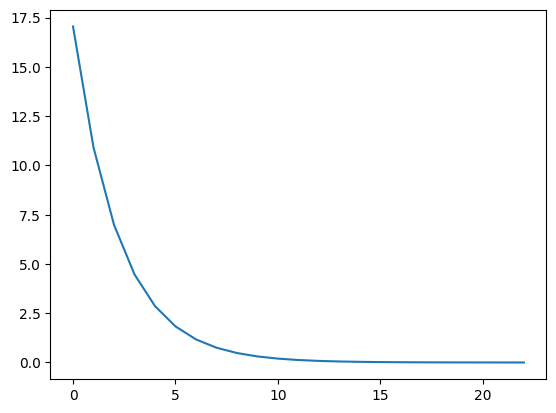

In [196]:
N = 200
alpha = 0.01
eps = 1e-3

x0 = jnp.array([0.0, 0.0]) # initial point is (0, 0)

x_old = x0
x_new = x_old - alpha * grad_jit(x_old)

history_tol = []
while np.abs(f_jit(x_new) - f_jit(x_old)) > eps and len(history_tol) < N:
    x_old = x_new
    x_new = x_old - alpha * grad_jit(x_old)
    print(grad_jit(x_new), x_new)
    history_tol.append(np.abs(f_jit(x_new) - f_jit(x_old)))

plt.plot(history_tol)

[-21.760002 -24.32    ] [0.3599999 1.0800002]
[19.456001 17.408005] [2.5360003 3.512    ]
[-13.926403 -15.564804] [0.5904001 1.7711996]
[12.451843 11.141125] [1.9830405 3.32768  ]
[-8.912896  -9.9614725] [0.73785615 2.2135677 ]
[7.9691772 7.1303177] [1.6291459 3.209715 ]
[-5.704254  -6.3753433] [0.8322281 2.4966831]
[5.100277 4.563404] [1.4026536 3.1342175]
[-3.6507225 -4.080223 ] [0.89262587 2.6778772 ]
[3.2641754 2.9205818] [1.257698  3.0858996]
[-2.336464  -2.6113434] [0.9312805 2.7938414]
[2.0890732 1.8691711] [1.1649269 3.0549757]
[-1.4953346 -1.671257 ] [0.9560196 2.8680587]
[1.3370056 1.1962662] [1.105553  3.0351844]
[-0.9570122 -1.069603 ] [0.9718525 2.9155579]
[0.8556824  0.76560974] [1.0675538 3.0225182]
[-0.6124878 -0.6845436] [0.9819855 2.9459572]
[0.5476341  0.48999023] [1.0432343 3.0144114]
[-0.39199066 -0.43811035] [0.9884709 2.9654124]
[0.35048676 0.31359482] [1.02767   3.0092235]
[-0.25087357 -0.28038788] [0.99262136 2.977864  ]
[0.22431183 0.20069885] [1.0177088 3.005

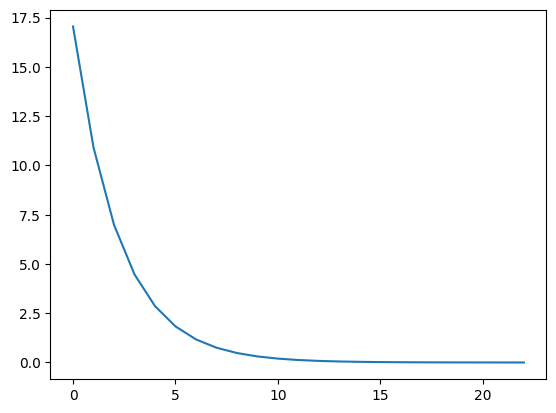

In [197]:
N = 200
alpha = 0.1
eps = 1e-3

x0 = jnp.array([0.0, 0.0]) # initial point is (0, 0)

x_old = x0
x_new = x_old - alpha * grad_jit(x_old)

history_tol = []
while np.abs(f_jit(x_new) - f_jit(x_old)) > eps and len(history_tol) < N:
    x_old = x_new
    x_new = x_old - alpha * grad_jit(x_old)
    print(grad_jit(x_new), x_new)
    history_tol.append(np.abs(f_jit(x_new) - f_jit(x_old)))

plt.plot(history_tol)

[-16.489601 -20.259201] [0.9216    1.0367999]
[-3.256546  -6.8153925] [1.609936  1.8305118]
[9.524094 6.226097] [2.262004  2.6130066]
[19.576164 16.5789  ] [2.753624  3.2549908]
[25.339104 22.67244 ] [3.0003204 3.6669877]
[26.178047 23.862255] [2.9689562 3.8110604]
[22.406303 20.452618] [2.678948  3.7021034]
[15.134903 13.546177] [2.1938775 3.3995159]
[5.993454  4.7649765] [1.605965  2.9917254]
[-3.2143927 -4.094082 ] [1.0169094 2.5770643]
[-10.852487 -11.400673] [0.5189032 2.24481  ]
[-15.72947  -15.968339] [0.17922252 2.059788  ]
[-17.268341 -17.224045] [0.03080462 2.0529516 ]
[-15.548568 -15.250313] [0.06991193 2.2190392 ]
[-11.22589  -10.705036] [0.2605942 2.5210211]
[-5.3564873 -4.645714 ] [0.5444671 2.8998551]
[0.83327866 1.7007713 ] [0.8535176 3.287263 ]
[6.184681 7.175865] [1.1233302 3.6189222]
[ 9.808403 10.891087] [1.3043149 3.8456569]
[11.2176285 12.361008 ] [1.3691169 3.9408073]
[10.375286  11.5504265] [1.3152626 3.9028325]
[7.6556168 8.8358345] [1.1630408 3.753151 ]
[3.735

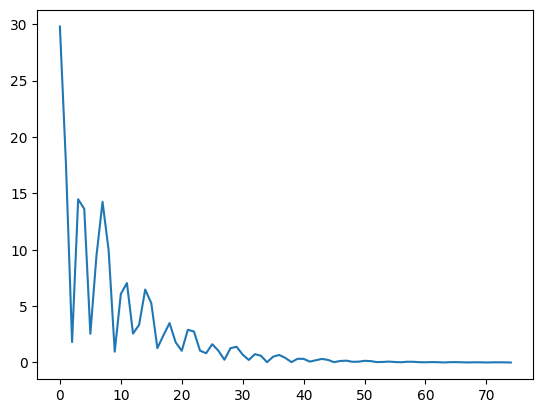

In [198]:
N = 200
alpha = 0.01
beta = 0.9
eps = 1e-3

x0 = jnp.array([0.0, 0.0]) # initial point is (0, 0)
v0 = jnp.array([0.0, 0.0]) # initial velocity is (0, 0)

x_old = x0
v_old = v0

v_new = beta * v_old +  grad_jit(x_old)
x_new = x_old - alpha * v_new


history_tol = []
while np.abs(f_jit(x_new) - f_jit(x_old)) > eps and len(history_tol) < N:
    x_old = x_new
    v_old = v_new
    v_new = beta * v_old +  grad_jit(x_old)
    x_new = x_old - alpha * v_new
    print(grad_jit(x_new), x_new)
    history_tol.append(np.abs(f_jit(x_new) - f_jit(x_old)))

plt.plot(history_tol)

[-19.065598 -22.867199] [0.7856 0.8848]
[-11.082466 -14.748833] [1.1990559 1.365872 ]
[-4.802746 -8.32817 ] [1.5166085 1.7538964]
[-0.5163574 -3.9007988] [1.7234123 2.0311902]
[ 1.9905396 -1.2557259] [1.8319777 2.2088451]
[3.1453896  0.03313828] [1.8663551 2.3102298]
[3.4056244 0.4226265] [1.8520899 2.3605907]
[3.1613693  0.30265808] [1.810901  2.3815448]
[ 2.6988907  -0.04050064] [1.758693  2.3889954]
[ 2.201004   -0.42394257] [1.7056    2.3931258]
[ 1.7658768 -0.7493515] [1.6570435 2.3994303]
[ 1.4316711 -0.9783859] [1.6151065 2.4100761]
[ 1.1996765 -1.1096039] [1.5798212 2.4251828]
[ 1.052475  -1.1602249] [1.5501819 2.4438322]
[ 0.9664459 -1.1537094] [1.5248374 2.464759 ]
[ 0.91908264 -1.1123962 ] [1.5025007 2.4867597]
[ 0.8924866 -1.0540276] [1.4821415 2.508884 ]
[ 0.87425995 -0.9908409 ] [1.463037  2.5304863]
[ 0.856987  -0.9301033] [1.4447422 2.5511959]
[ 0.83706284 -0.8752823 ] [1.427025  2.5708518]
[ 0.8134155  -0.82730865] [1.4097956 2.5894325]
[ 0.7864342 -0.7856674] [1.39304

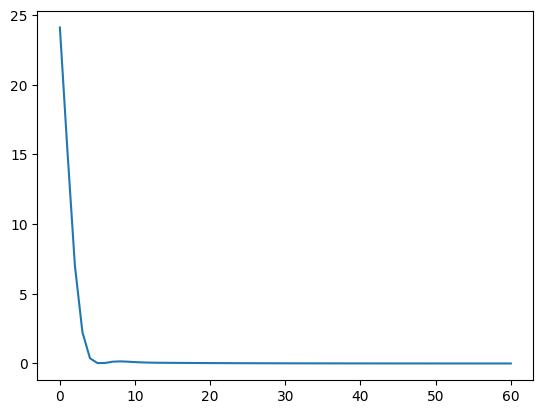

In [199]:
N = 200
alpha = 0.01
beta = 0.5
eps = 1e-3

x0 = jnp.array([0.0, 0.0]) # initial point is (0, 0)
v0 = jnp.array([0.0, 0.0]) # initial velocity is (0, 0)

x_old = x0
v_old = v0

v_new = beta * v_old +  grad_jit(x_old)
x_new = x_old - alpha * v_new


history_tol = []
while np.abs(f_jit(x_new) - f_jit(x_old)) > eps and len(history_tol) < N:
    x_old = x_new
    v_old = v_new
    v_new = beta * v_old +  grad_jit(x_old)
    x_new = x_old - alpha * v_new
    print(grad_jit(x_new), x_new)
    history_tol.append(np.abs(f_jit(x_new) - f_jit(x_old)))

plt.plot(history_tol)